# Análisis exploratorio de los datos

En este cuaderno se llevará a cabo el análisis exploratorio del conjunto de datos del Titanic. Emplearemos las librerias de Pandas, matplotlib, seaborn y numpy para poder analizar y graficar los resultados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### 1. Análisis del contenido de la base de datos
En primer lugar estudiaremos qué contiene la base de datos, es decir, número de registros, columnas, filas, nombres de las columnas.

In [3]:
df = pd.read_csv("../datasets/titanic.csv") # nota: ajustar la ruta según sea el caso
filas, columnas = df.shape
print(f"El conjunto de datos tiene {filas} filas y {columnas} columnas")

El conjunto de datos tiene 891 filas y 12 columnas


Aprovechando las funciones de pandas, podemos explorar los contenidos rapidamente

In [6]:
print("Las columnas son: ", list(df.keys())) # Ejercicio: buscar en internet qué significa cada una.

Las columnas son:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
# mostrar el contenido de las primeras 5 filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# muestrear aleatoriamente n filas y mostrarlas
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
99,100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S


Al analizar las muestras de las primeras 5 y las muestras aleatorias, se aprecia que hay varios tipos de datos, por ejemplo, los nombres son textos, la cabina tiene valores faltantes (NaN) que significa not a number. De esta forma conocemos mejor qué nos podemos encontrar en los datos, para ver todos los tipos de datos podemos obtener los dtypes


In [10]:
tipos_de_datos = pd.DataFrame(df.dtypes)
tipos_de_datos # mostramos qué tipo de dato hay en cada serie de pandas

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [12]:
# Revisando qué valores faltan en el conjunto de datos
faltantes = df.isnull().sum()
faltantes
# Vemos que faltan 177 datos de edad.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# identificando cuantos valores únicos hay
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [15]:
# realizando el análisis estadístico de los datos no numéricos
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [16]:
# análisis descriptivo de las columnas numéricas
df.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


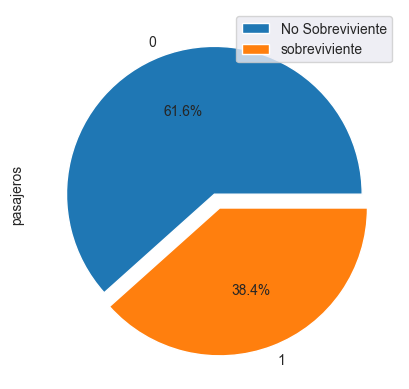

In [22]:
# al conocer las categorías podemos saber un poco más sobre la historia contada desde los datos
# por ejemplo, revisando la supervivencia:
sobrevivientes = df["Survived"].value_counts()
explode = (0, 0.1) # solo para embellecer el gráfico separando in poquito la torta.
sobrevivientes.plot(kind ="pie", autopct="%1.1f%%", explode=explode)
plt.ylabel("pasajeros")
plt.legend(["No Sobreviviente", "sobreviviente"])

Text(0.5, 1.0, 'Distribución de la edad')

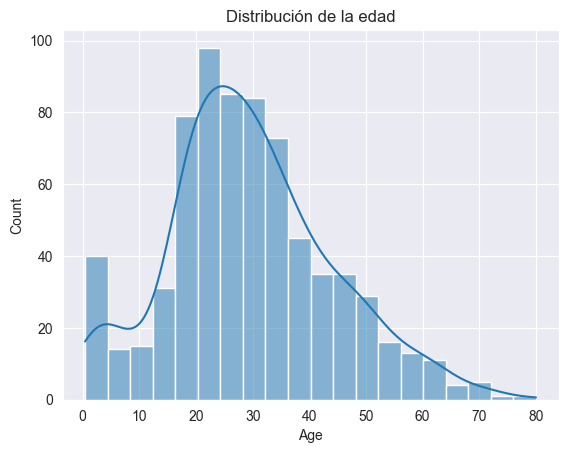

In [23]:
# Otras exploraciones interesantes de las variables son los valores y sus distribuciones. Por ejemplo, la edad. Como la edad tiene nulos, los eliminamos con la opcion dropna
sns.histplot(df["Age"].dropna(), kde=True)
plt.title("Distribución de la edad")

Text(0.5, 1.0, 'Distribución del costo del tiquete')

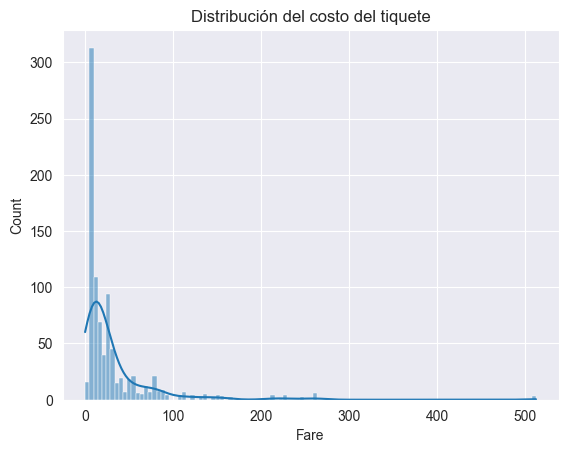

In [27]:
# Lo mismo para el costo del boleto o la clase del pasajero
sns.histplot(df["Fare"].dropna(), kde=True)
plt.title("Distribución del costo del tiquete")
# En el caso del tiquete, la distribución aparece con mucho sesgo, es decir parece que hay outliers.
# los outliers pueden verse mejor con un diagrama de cajas y bigotes


<Axes: ylabel='Fare'>

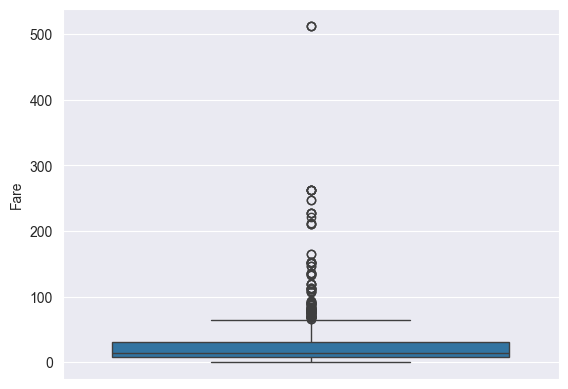

In [31]:
sns.boxplot(df["Fare"])
# Se aprecia que hay varios valores que están por fuera del rango intercuartil (outliers)
# Una forma de entender mejor es separar el boxplots con otras categorias, por ejemplo la edad


<Axes: xlabel='Pclass', ylabel='Fare'>

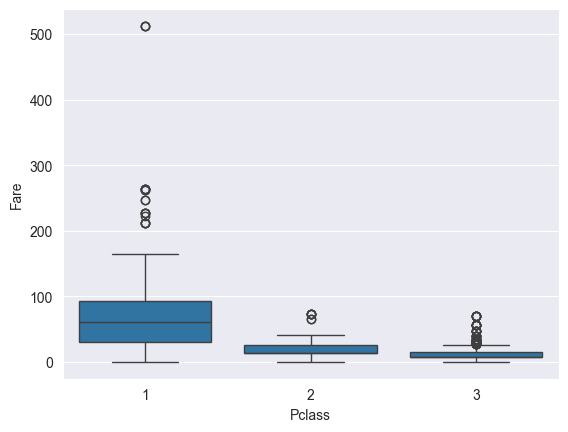

In [36]:
sns.boxplot(df, x="Pclass", y="Fare")
# Al ver la distribución separando la variable por la clase (passenger class) vemos que los outliers están en primera clase (boletos más costosos)
# podemos sacar esos outliers y ver por qué pagaron tanto estas personas

In [70]:
costosos = df[df["Fare"] > 200]
costosos = costosos.sort_values(by=["Fare"], ascending=False) # ordenando por costo de mayor a menor
costosos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


In [52]:
index = costosos["Fare"].idxmax() # localizamos la fila con el máximo
outlier = df.iloc[index] # obtenemos la fila del dataframe
outlier # mostramos la info

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object

<Axes: ylabel='count'>

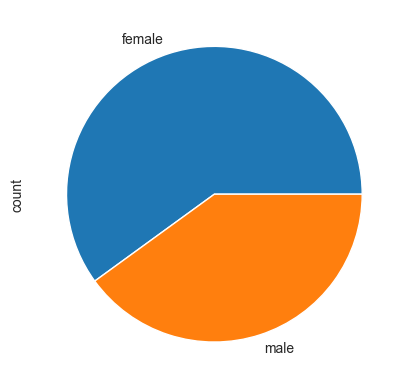

In [63]:
# Un dato interesante sobre los outliers es que hubo más mujeres que hombres con tiquetes muy costosos
costosos["Sex"].value_counts().plot(kind="pie")

Sex
female    12
male       8
Name: count, dtype: int64

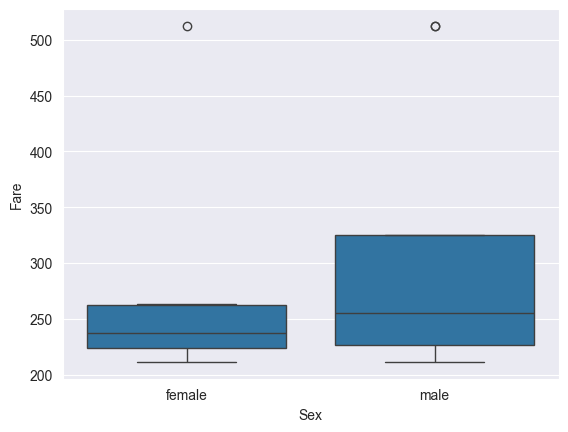

In [71]:
# Sin embargo, los hombres tuvieron costos mas altos en promedio.
sns.boxplot(costosos, x="Sex", y="Fare")
costosos["Sex"].value_counts()
# al revisar, cada cabina tenía un precio diferente dependiendo del espacio, si es compartida, si tenía ventanas, empleados, entre otros beneficios.
# por ejemplo, los tiquetes más costosos tenían la mejor cabina del barco, se puede ver en:
# https://titanic.fandom.com/wiki/Cabins_B-51/53/55

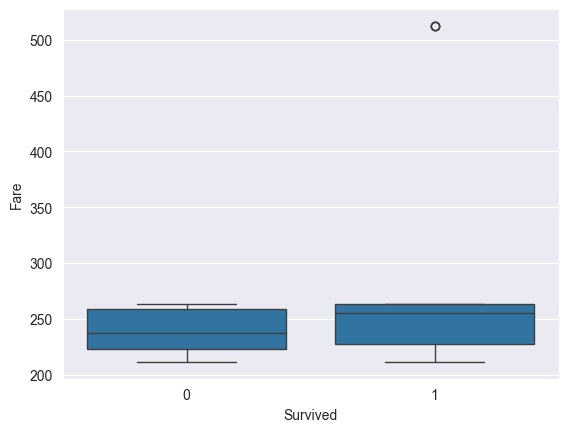

Text(0.5, 1.0, 'Supervivencia de los tiquetes más costosos')

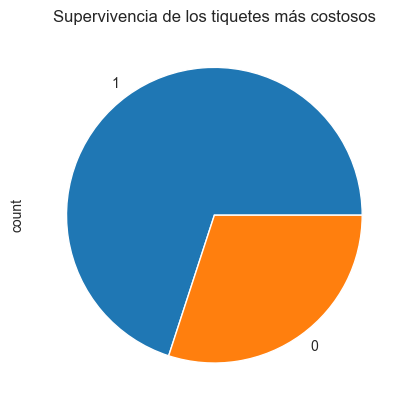

In [74]:
# En cuando a la supervivencia, veamos si valía la pena tener un tiquete con un costo por encima de la media de primera clase
sns.boxplot(costosos, x="Survived", y="Fare")
plt.show()
costosos["Survived"].value_counts().plot(kind="pie")
plt.title("Supervivencia de los tiquetes más costosos")

In [77]:
# separando los costosos por género
hombres = costosos[costosos["Sex"] == "male"]
mujeres = costosos[costosos["Sex"] == "female"]
print(f"Se tienen {len(hombres)} Hombres y {len(mujeres)} Mujeres")

Se tienen 8 Hombres y 12 Mujeres


Se puede analizar que, si bien un tiquete costoso daba más probabilidades de supervivencia

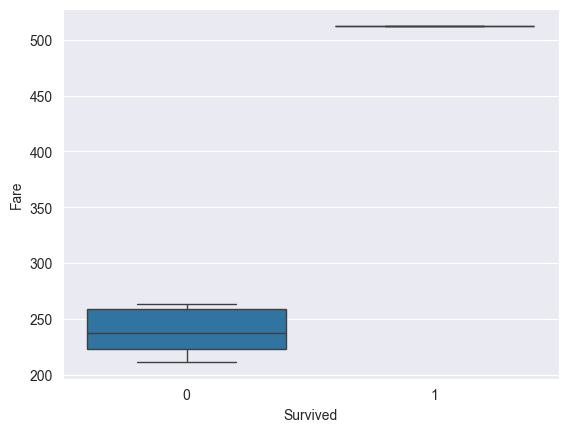

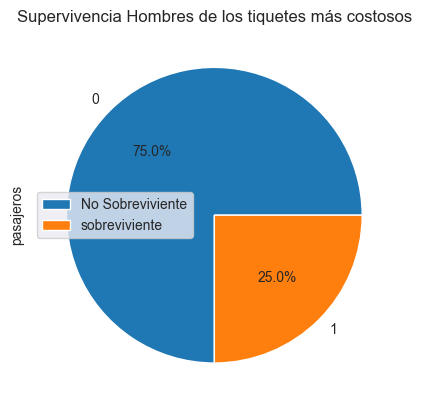

In [80]:
sns.boxplot(hombres, x="Survived", y="Fare")
plt.show()
hombres["Survived"].value_counts().plot(kind="pie",  autopct="%1.1f%%")
plt.title("Supervivencia Hombres de los tiquetes más costosos")
plt.ylabel("pasajeros")
plt.legend(["No Sobreviviente", "sobreviviente"])


De los 8 hombres en tiquetes más costosos, logró sobrevivir el 75% (6 vivieron y 2 murieron)

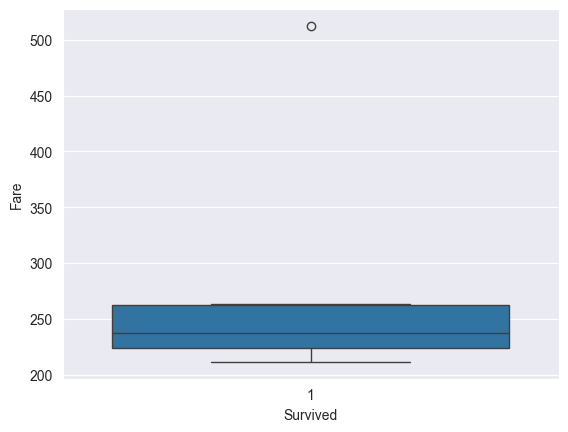

Text(0.5, 1.0, 'Supervivencia de los tiquetes más costosos')

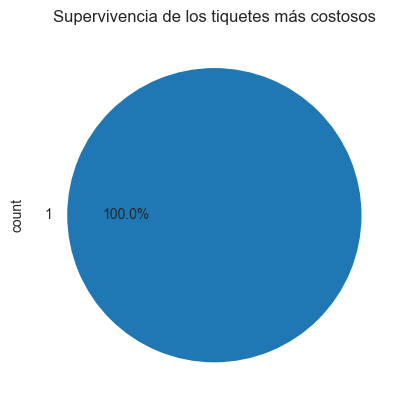

In [82]:
sns.boxplot(mujeres, x="Survived", y="Fare")
plt.show()
mujeres["Survived"].value_counts().plot(kind="pie",  autopct="%1.1f%%",)
plt.title("Supervivencia de los tiquetes más costosos")


En el caso de las mujeres todas sobrevivieron en primera clase con los tiquetes outlier (mas costosos)
**Ejercicio**
realizar el mismo calculo para los valores NO outliers de primera clase, los valores outliers y no outliers de clase 2 y los valores outliers y no outliers de clase 3
Luego comparar la supervivencia